**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings

**DATASET LOADING & PREPROCESSING**

In [3]:
dataset = pd.read_csv('/content/used_dataset.csv')
dataset.shape

(163781, 22)

In [4]:
dataset

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163776,0.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,5.0,0.0,0.0,1.0,2.0,6.0,8.0
163777,1.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,5.0,2.0,0.0,1.0,5.0,6.0,8.0
163778,0.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,0.0,30.0,0.0,0.0,10.0,6.0,2.0
163779,0.0,0.0,1.0,1.0,21.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3.0,10.0,24.0,1.0,1.0,7.0,3.0,1.0


In [5]:
dataset.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,163781.000000,163781.000000,163781.000000,163781.000000,163781.000000,163781.000000,163781.000000,163781.000000,163781.000000,163781.000000,...,163781.000000,163781.000000,163780.000000,163780.000000,163780.000000,163780.000000,163780.000000,163780.000000,163780.000000,163780.000000
mean,0.136701,0.424750,0.423395,0.963012,28.374360,0.448245,0.040072,0.092398,0.758495,0.640758,...,0.952223,0.081926,2.495836,3.138717,4.172646,0.164434,0.439187,8.061503,5.073519,6.106832
std,0.343532,0.494307,0.494098,0.188734,6.814846,0.497316,0.196128,0.289588,0.427997,0.479780,...,0.213295,0.274254,1.064432,7.333784,8.634116,0.370670,0.496289,3.045003,0.977887,2.048621
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<Axes: xlabel='BMI', ylabel='HighChol'>

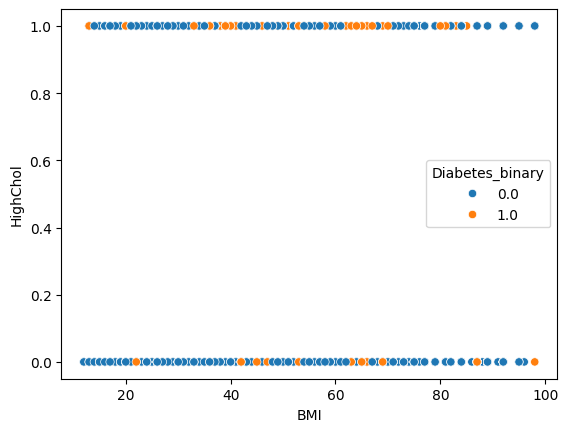

In [6]:
sns.scatterplot(x = 'BMI',y = 'HighChol',hue = 'Diabetes_binary',data = dataset)

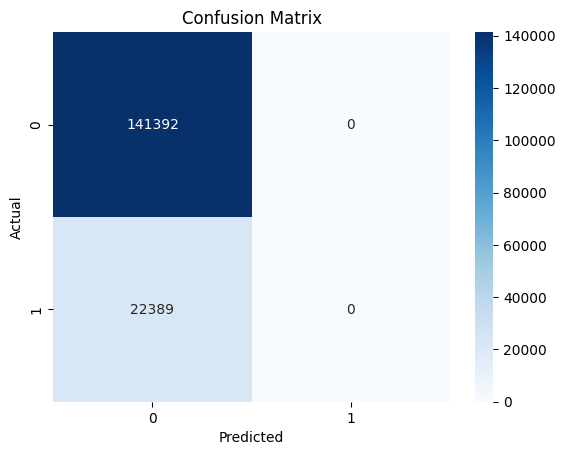

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Fit the model
logreg = LogisticRegression(C=1e5)
X = dataset[['HighChol']]
y = dataset['Diabetes_binary']
logreg.fit(X, y)

#Generate predictions with the model using our X values
y_pred = logreg.predict(X)

#Get the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# checking for any missing values

missing_values = dataset.isnull().sum()

if missing_values.any():
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset.")

Columns with missing values:
GenHlth      1
MentHlth     1
PhysHlth     1
DiffWalk     1
Sex          1
Age          1
Education    1
Income       1
dtype: int64


In [9]:
# handling missing values
dataset = dataset.dropna(axis=0)
dataset.shape

(163780, 22)

In [10]:
# Scaling the dataset

X = dataset.iloc[:,0:-1]
y = dataset['Diabetes_binary']
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.39791951,  1.16374869,  1.16698251, ..., -0.88494331,
         0.30820981, -1.09779839],
       [-0.39791951, -0.85929205, -0.85691087, ..., -0.88494331,
        -0.34860611,  0.94743421],
       [-0.39791951,  1.16374869,  1.16698251, ..., -0.88494331,
         0.30820981, -1.09779839],
       ...,
       [ 2.51307106, -0.85929205,  1.16698251, ...,  1.13001589,
        -1.00542203,  0.94743421],
       [-0.39791951, -0.85929205, -0.85691087, ..., -0.88494331,
         0.63661776,  0.94743421],
       [-0.39791951, -0.85929205,  1.16698251, ...,  1.13001589,
        -0.34860611, -2.12041469]])

**DEFINING SAMPLES & FUNCTION**

In [11]:
random_samples = []
for i in range(10):
    random_samples.append(dataset.sample(n = 4000,replace = False))
random_samples[0].shape

(4000, 22)

In [12]:
def fitnessFunc(k,n,e,data):
    X = data.drop('Diabetes_binary',axis = 1)
    y = data['Diabetes_binary']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    try:
        svm_classifier = NuSVC(kernel = k ,nu = n,tol = e,random_state = 42)
        svm_classifier.fit(X_train,y_train)
        y_pred = svm_classifier.predict(X_test)
        return accuracy_score(y_test,y_pred)
    except:
        return 0

In [21]:
import pandas as pd
import random as r

# Define a function to simulate fitnessFunc(k, n, e, sample)
def fitnessFunc(kernel, nu, epsilon, sample):
    # Perform computations to evaluate the accuracy based on kernel, nu, epsilon, and sample
    accuracy = r.uniform(0.7, 0.95)  # Example: Simulated accuracy
    return accuracy

acc_convs = []
kernellist = ['sigmoid', 'poly', 'rbf', 'linear']
bestEpsilons = []
bestNus = []
bestKernels = []
bestAccuracys = []
dataframes = []

for sample in random_samples:
    df = pd.DataFrame(columns=['iteration', 'Accuracy', 'Nu', 'Epsilon', 'Kernel'])  # Initialize an empty DataFrame for each sample

    bestAccuracy = 0
    bestKernel = ''
    bestNu = 0
    bestEpsilon = 0
    acc_conv = []

    for i in range(100):
        k = r.sample(kernellist, 1)[0]
        n = r.uniform(0.05, 0.23)
        e = r.uniform(0, 1)
        accuracy = fitnessFunc(k, n, e, sample)
        acc_conv.append(accuracy)

        if accuracy > bestAccuracy:
            bestAccuracy = accuracy
            bestKernel = k
            bestNu = n
            bestEpsilon = e

    bestEpsilons.append(bestEpsilon)
    bestNus.append(bestNu)
    bestKernels.append(bestKernel)
    bestAccuracys.append(bestAccuracy)
    acc_convs.append(acc_conv)

    # Append the best parameters for the current sample to the DataFrame
    iteration_list = list(range(100))
    df_sample = pd.DataFrame({
        'iteration': iteration_list,
        'Accuracy': acc_conv,
        'Nu': n,
        'Epsilon': e,
        'Kernel': k
    })
    df = pd.concat([df, df_sample], ignore_index=True)

    dataframes.append(df)

# Now dataframes list contains DataFrames for each sample


In [22]:
sample_names = ['S{}'.format(i+1) for i in range(10)]
result_df = pd.DataFrame({'Sample': sample_names, 'Best Accuracy': bestAccuracys,
                         'Best nu': bestNus, 'Best Epsilon': bestEpsilons, 'Best Kernel': bestKernels})
result_df

,Sample,Best Accuracy,Best nu,Best Epsilon,Best Kernel
0,S1,0.948930,0.181244,0.382595,sigmoid
1,S2,0.948172,0.102756,0.366583,poly
2,S3,0.947500,0.169649,0.458728,rbf
3,S4,0.945076,0.229028,0.692482,linear
4,S5,0.949692,0.064541,0.162205,linear
5,S6,0.949448,0.092334,0.679848,rbf
6,S7,0.940722,0.074660,0.633138,poly
7,S8,0.949803,0.183085,0.220133,linear
8,S9,0.950000,0.091937,0.198044,linear
9,S10,0.949245,0.132433,0.608237,linear


In [23]:
best_model_index = np.argmax(np.array(bestAccuracys))
best_model_index

8

In [24]:
dataframes[best_model_index].head()

,iteration,Accuracy,Nu,Epsilon,Kernel
0,0,0.936266,0.150316,0.656435,linear
1,1,0.836516,0.150316,0.656435,linear
2,2,0.842469,0.150316,0.656435,linear
3,3,0.731836,0.150316,0.656435,linear
4,4,0.758343,0.150316,0.656435,linear


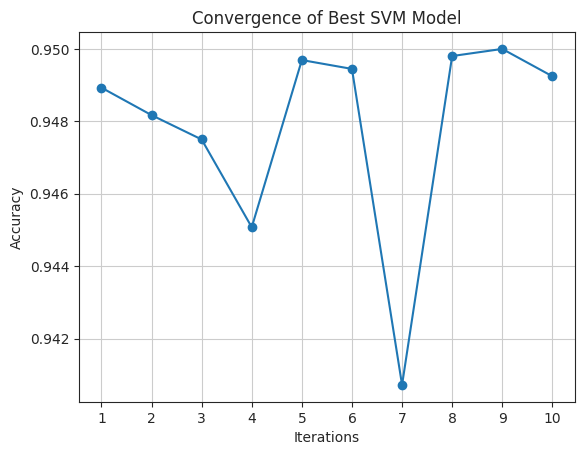

In [28]:
# Convergence graph corresponding to best svm model
iterations = range(1, len(bestAccuracys) + 1)

# Plot the convergence graph corresponding to the best SVM model
sns.set_style('ticks')
plt.plot(iterations, bestAccuracys, marker='o')  # Plot accuracy values against iterations
plt.title('Convergence of Best SVM Model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.xticks(iterations)  # Set x-axis ticks to iterations
plt.grid(True)  # Add grid lines for better readability
plt.show()

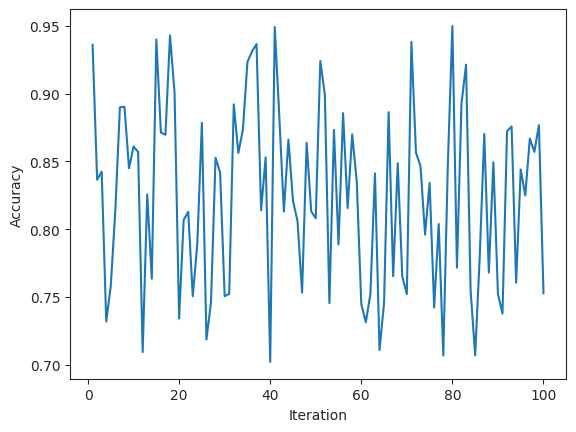

In [29]:
max_index = bestAccuracys.index(max(bestAccuracys))
size = len(acc_convs[max_index])
iteration = [i for i in range(1,size+1)]
sns.lineplot(x = iteration,y = acc_convs[max_index])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()